In [289]:
# importing tools and libraries

import pandas as pd
import numpy as np
from astropy.table import Table
from scipy import integrate
import math
import csv
import matplotlib.pyplot as plt
import matplotlib as mpl
from read_mist_models import ISOCMD, EEPCMD
%run read_mist_models

In [65]:
# loading in GAIA file and write new one with usable sources
# lots of data missing (hence empty cell/NaN cuts)

fp_i='/Users/hannahgruber/Documents/400A/47tuc_gaia1.csv'
fp_o='/Users/hannahgruber/Documents/400A/47tuc_edited.csv'
with open(fp_i,'rt') as inp, open(fp_o,'wt') as out:
    write=csv.writer(out)
    for row in csv.reader(inp):
        if row[4]!='': # getting rid of empty cells
            if row[8]!='':
                if row[9]!='':
                    if 0.1951>=float(row[4])>=-0.1951: # within parallax angle of cluster - check this number
                        write.writerow(row)

In [203]:
# create arrays of data to plot

gaiadat=open(fp_o,'rt')
g_band_c=[] 
bp_rp_c=[]
parallax=[]
ra=[]
dec=[]
bp_rp_uc=[]
bp_rp_direct=[]

for row in csv.reader(gaiadat): 
    d_i=1/((float(row[4]))/1000)
    g_band_c.append((float(row[8]))-(2.5*(np.log10((d_i/10)**2)))) 
    bp_rp_c.append((float(row[9]))-(2.5*(np.log10((d_i/10)**2)))) 
    parallax.append(float(row[4])/1000)
    ra.append(float(row[5]))
    dec.append(float(row[6]))
    bp_rp_uc.append((float(row[9]))-(2.5*(np.log10(((1/(float(row[4])))/10)**2))))
    bp_rp_direct.append((float(row[9]))) # this is the bp_rp i used for my good graph

# only 187 entries... wanted to get more data but couldn't figure out how to get the next 2000 from Gaia
# it is the same 2000 every time

In [ ]:
# reading MIST models and creating isochrones at a few ages

fp_iso = '/Users/hannahgruber/Documents/400A/MIST_iso_67b4e5f70eaae.iso.cmd'
iso=ISOCMD(fp_iso)

age1=iso.age_index(9.2)
data1=iso.isocmds[age1]
iso_bp1=iso.isocmds[age1]['Gaia_BP_EDR3']
iso_rp1=iso.isocmds[age1]['Gaia_RP_EDR3']
iso_g1=iso.isocmds[age1]['Gaia_G_EDR3']

age2=iso.age_index(9.5)
data2=iso.isocmds[age2]
iso_bp2=iso.isocmds[age2]['Gaia_BP_EDR3']
iso_rp2=iso.isocmds[age2]['Gaia_RP_EDR3']
iso_g2=iso.isocmds[age2]['Gaia_G_EDR3']

age3=iso.age_index(10)
data3=iso.isocmds[age3]
iso_bp3=iso.isocmds[age3]['Gaia_BP_EDR3']
iso_rp3=iso.isocmds[age3]['Gaia_RP_EDR3']
iso_g3=iso.isocmds[age3]['Gaia_G_EDR3']

age4=iso.age_index(10.3)
data4=iso.isocmds[age4]
iso_bp4=iso.isocmds[age4]['Gaia_BP_EDR3']
iso_rp4=iso.isocmds[age4]['Gaia_RP_EDR3']
iso_g4=iso.isocmds[age4]['Gaia_G_EDR3']


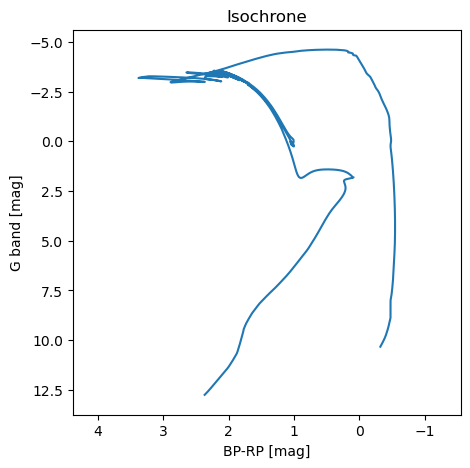

In [298]:
# just isochrone

fig, ax = plt.subplots(figsize=(5,5))
plt.xlim((max(iso_bp1-iso_rp1)+1,min(iso_bp1-iso_rp1)-1))
plt.ylim((max(iso_g1)+1,min(iso_g1)-1))
plt.xlabel("BP-RP [mag]")
plt.ylabel("G band [mag]")
plt.title("Isochrone")
plt.plot(iso_bp1-iso_rp1,iso_g1)
plt.show()

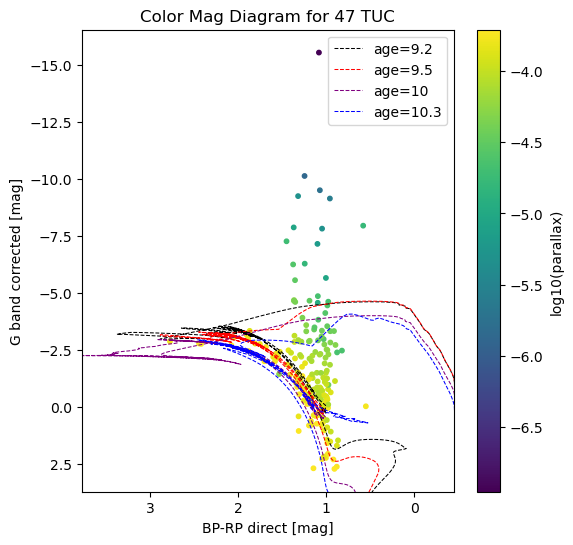

In [276]:
# final graph w/ isochrones

fig, ax = plt.subplots(figsize=(6,6))
plt.xlim((max(bp_rp_direct)+1,min(bp_rp_direct)-1))
plt.ylim((max(g_band_c)+1,min(g_band_c)-1))
plt.xlabel("BP-RP direct [mag]")
plt.ylabel("G band corrected [mag]")
plt.title("Color Mag Diagram for 47 TUC")
plt.scatter(bp_rp_direct,g_band_c,s=10,c=[np.log10(abs(p)) for p in parallax],marker='o',cmap='viridis')
plt.plot(iso_bp1-iso_rp1,iso_g1,c='k',linestyle='--',linewidth=.75,label='age=9.2')
plt.plot(iso_bp2-iso_rp2,iso_g2,c='r',linestyle='--',linewidth=.75,label='age=9.5')
plt.plot(iso_bp3-iso_rp3,iso_g3,c='purple',linestyle='--',linewidth=.75,label='age=10')
plt.plot(iso_bp4-iso_rp4,iso_g4,c='b',linestyle='--',linewidth=.75,label='age=10.3')
plt.legend()
cbar=plt.colorbar()
cbar.set_label('log10(parallax)')
plt.show()

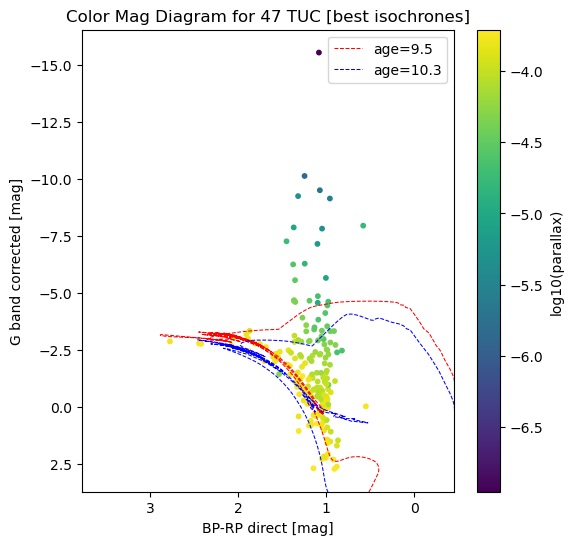

In [287]:
# final plot with what I consider to be the best fit isochrones

fig, ax = plt.subplots(figsize=(6,6))
plt.xlim((max(bp_rp_direct)+1,min(bp_rp_direct)-1))
plt.ylim((max(g_band_c)+1,min(g_band_c)-1))
plt.xlabel("BP-RP direct [mag]")
plt.ylabel("G band corrected [mag]")
plt.title("Color Mag Diagram for 47 TUC [best isochrones]")
plt.scatter(bp_rp_direct,g_band_c,s=10,c=[np.log10(abs(p)) for p in parallax],marker='o',cmap='viridis')
plt.plot(iso_bp2-iso_rp2,iso_g2,c='r',linestyle='--',linewidth=.75,label='age=9.5')
plt.plot(iso_bp4-iso_rp4,iso_g4,c='b',linestyle='--',linewidth=.75,label='age=10.3')
plt.legend()
cbar=plt.colorbar()
cbar.set_label('log10(parallax)')
plt.show()

In [ ]:
# reading evolutionary tracks

fp_01='/Users/hannahgruber/Documents/400A/MIST_eep_67b68f1c47562/0001000M.track.eep.cmd'
fp_1='/Users/hannahgruber/Documents/400A/MIST_eep_67b68f1c47562/0010000M.track.eep.cmd'
fp_10='/Users/hannahgruber/Documents/400A/MIST_eep_67b68f1c47562/0100000M.track.eep.cmd'
fp_100='/Users/hannahgruber/Documents/400A/MIST_eep_67b68f1c47562/1000000M.track.eep.cmd'

eepcmd01=EEPCMD(fp_01)
eepcmd1=EEPCMD(fp_1)
eepcmd10=EEPCMD(fp_10)
eepcmd100=EEPCMD(fp_100)

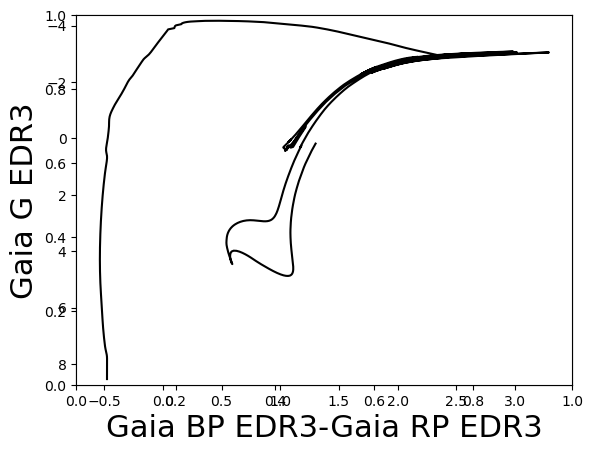

In [299]:
# just evol track

eepcmd1.plot_CMD(['Gaia_BP_EDR3', 'Gaia_RP_EDR3', 'Gaia_G_EDR3'], color='k')

In [ ]:
''' 
final graph w/ evol tracks
unfortunately the code documentation doesn't seem to have a way to overplot these,
    so they are all getting put into their own graphs

fig, ax = plt.subplots(figsize=(6,6))
plt.xlim((max(bp_rp_direct)+1,min(bp_rp_direct)-1))
plt.ylim((max(g_band_c)+1,min(g_band_c)-1))
plt.xlabel("BP-RP direct [mag]")
plt.ylabel("G band corrected [mag]")
plt.title("Color Mag Diagram for 47 TUC")
plt.scatter(bp_rp_direct,g_band_c,s=10,c=[np.log10(abs(p)) for p in parallax],marker='o',cmap='viridis')
cbar=plt.colorbar()
cbar.set_label('log10(parallax)')
eepcmd01.plot_CMD(['Gaia_BP_EDR3', 'Gaia_RP_EDR3', 'Gaia_G_EDR3'], color='k',label='M=0.1Msun')
eepcmd1.plot_CMD(['Gaia_BP_EDR3', 'Gaia_RP_EDR3', 'Gaia_G_EDR3'], color='r',label='M=1Msun')
eepcmd10.plot_CMD(['Gaia_BP_EDR3', 'Gaia_RP_EDR3', 'Gaia_G_EDR3'], color='purple',label='M=10Msun')
eepcmd100.plot_CMD(['Gaia_BP_EDR3', 'Gaia_RP_EDR3', 'Gaia_G_EDR3'], color='b',label='M=100Msun')
plt.legend()
plt.show()
'''

In [ ]:
'''
looks ok but is wrong

fig, ax = plt.subplots(figsize=(6,6))
plt.xlim((max(bp_rp_uc)+1,min(bp_rp_uc)-1))
plt.ylim((max(g_band_c)+1,min(g_band_c)-1))
plt.xlabel("BP-RP uncorrected [mag]")
plt.ylabel("G band corrected [mag]")
plt.title("Color Mag Diagram for 47 TUC")
plt.scatter(bp_rp_uc,g_band_c,s=10,c=np.log10(parallax),marker='o',cmap='magma')
plt.plot(iso_bp1-iso_rp1,iso_g1,c='k',linestyle='--',linewidth=.75,label='age=9.2')
plt.plot(iso_bp2-iso_rp2,iso_g2,c='r',linestyle='--',linewidth=.75,label='age=9.5')
plt.plot(iso_bp3-iso_rp3,iso_g3,c='purple',linestyle='--',linewidth=.75,label='age=10')
plt.plot(iso_bp4-iso_rp4,iso_g4,c='b',linestyle='--',linewidth=.75,label='age=10.3')
plt.legend()
plt.colorbar()
plt.show()
'''

In [ ]:
'''
totally wrong

fig, ax = plt.subplots(figsize=(6,6))
plt.xlim((max(bp_rp_c)+1,min(bp_rp_c)-1))
plt.ylim((max(g_band_c)+1,min(g_band_c)-1))
plt.xlabel("BP-RP corrected [mag]")
plt.ylabel("G band corrected [mag]")
plt.title("Color Mag Diagram for 47 TUC")
plt.scatter(bp_rp_c,g_band_c,s=10,c=np.log10(parallax),marker='o',cmap='magma',label='log(parallax)')
plt.plot(iso_bp-iso_rp,iso_g)
plt.colorbar()
plt.show()
'''